# コンピュータの言語2024：課題8

今回の授業では他のファイルに書かれた関数をモジュールとして呼び出す方法，そして色の表現について学びました．以下はそれについての演習です．

## モジュール

授業のスライドでは，別のファイルに書かれた関数を使いたいときには，モジュールとしてファイル名を呼び出す，ということを紹介しました．

例えば，以下のような計算に関するライブラリ "calc.py" を作成したとします．

```python
def add(x,y):
	return x+y
def sub(x,y):
	return x-y
def mul(x,y):
	return x*y
```

まずは，このコードが書かれたファイルを，以下のプログラムを実行してダウンロードしてください．（コードを理解する必要はありません）

In [1]:
import urllib.request

url = "http://ogilab.kutc.kansai-u.ac.jp/complang/downloads/calc.py" #ファイルのURL
title = "calc.py" #保存するファイル名
urllib.request.urlretrieve(url,title)

('calc.py', <http.client.HTTPMessage at 0x7f75d2cad630>)

ファイルのメニューを見ると，このファイルができているのが確認できると思います．
それでは，このファイルに記述されている関数を使ってみましょう．

In [3]:
import calc

a=2
b=3

x = calc.add(a,b)
print(x)

5


ある関数だけを読み込むときには以下のようにできます．

さらに，全ての関数を読み込むときには，全てという意味で * という記号を使って以下のように書くことができます．

In [2]:
from calc import *

print("input: 2,3")
print("add:", add(2,3))
print("sub:", sub(2,3))
print("mul:", mul(2,3))

input: 2,3
add: 5
sub: -1
mul: 6


ただし，プログラムの規模が多くなってくると，あるファイルで定義された関数の名前が，別のファイルで定義された関数の名前と一緒になってしまい，意図しない挙動をしてしまうことが出てくるという問題が生じます．ですので，上記の書き方は推奨されていません．

ですが，モジュールの名前を短く書けるように，以下のように，名前をつけ直すという書き方ができます．

In [ ]:
import calc as cal

print( cal.add(2,3) )

"calc" というモジュールを cal という名前として(as) 使うという意味ですね．

以下のプログラムを試してください．また，別の書き方ができるということも試してください．

In [ ]:
import calc

a = 2
b = 3

print( calc.add(a,b) )
print( calc.sub(a,b) )
print( calc.mul(a,b) )

### 練習1

Python にあらかじめ組み込まれているモジュールも同様に呼び出すことができます．Python にはデフォルトで非常に[多くのモジュール](https://docs.python.jp/3/library/)が用意されています．

ここでは，そのいくつかを呼び出してみましょう．

(A) [calendar](https://news.mynavi.jp/article/zeropython-20/) というモジュールは指定した年月のカレンダーを表示してくれます．
以下の関数が機能するように，XXXXXX を書き換えてください．

In [6]:
 import calendar as cal
 print( cal.month(2024, 11)) # 2024年11月のカレンダーを表示

   November 2024
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28 29 30



(B) 乱数はガチャなどのくじを作ったりするときに重要です．random というモジュールは様々な方法で乱数を生成する関数を提供してくれます．その中に ```randint``` という関数は指定した範囲でランダムな整数を出力してくれます．

この関数が機能するように，XXXXXX を書き換えてください．

In [7]:
import random as rand

for i in range(10):
    x = rand.randint(1,10)   #1 から 10 の中から乱数を生成する
    print(x)

1
6
10
7
10
1
2
4
3
10


### 練習2
あなたが何かの作品を制作したり商品をデザインするとき様々な色があるということに驚くでしょう．色を決めるためには全体のバランスを考えて[配色](http://ja.wikipedia.org/wiki/配色)などに気を使わなければなりませんし，また，それによって引き出したい雰囲気を出すことが可能です．そのためには色々なツールがありますが，その一つとして「[日本の伝統色](http://nipponcolors.com/#nakabeni)」には様々な伝統色についての RGB あるいは
CMYK表現が参照できるようになっています．その中の「鶯」という色について，RGBによる１６進数表現を求め，#ABCDEF のように答えてください．

鶯の色は "#168,143,63"

## ピクセル・ドット

コンピュータで画像を扱うときの，色情報を持つ最小単位のことを __画素（ピクセル）__ と言います．また画面上に表示する場合の最小単位を __ドット__ と言います．これらは同一の言葉として使われることも多いです．

## 画像の大きさ
今回の授業では色の表現について学びました．１つのピクセルについて，RGB の３色を使って表現する場合，一つの色について２５６段階（１バイト）で表現したとすると，１ピクセルあたり 3 [バイト] 必要ということになります．iPhone6 のカメラは 800万画素であるそうですので，写真１枚当たりのファイルサイズは以下のように計算することができます．

In [ ]:
gaso = 800*(10**4)
print( "size=", gaso*3, "[Byte]" )
print( "size=", gaso*3/1024, "[KByte]")
print( "size=", gaso*3/1024/1024, "[MByte]")

実際には，画像は jpeg などの形式で圧縮されて保存されますので，ここまで大きなファイルサイズにはなりません．

### 練習3
以下の画像は，画素数から計算されるサイズに比べて，圧縮率を計算してみましょう．この画像は幅 320 ピクセル，高さ 240ピクセルです．（画像のサイズはダウンロードしてプロパティを見るなどして調べてください．圧縮率は例えば，800 kbyte のサイズが 400 kbyte に圧縮されていたら，(圧縮後のサイズ)/(圧縮前のサイズ)x100=400/800x100=50% と計算してください．）

![](https://ogilab.kutc.kansai-u.ac.jp/downloads/complang/figs_kadai08/pasta.jpg)

In [11]:
gaso = 320 * 240
file_size = gaso * 3   # 単位は [byte]

jpeg_size = 21130

compress_rate = jpeg_size/file_size*100

print( "圧縮率は",compress_rate,"%" )

圧縮率は 9.171006944444445 %


### 練習4（基本情報処理技術者試験より改変）

１文字が，縦 32 ドット，横 32 ドットで表される２値ビットマップのフォントがある。 文字データが 8,192 種類あるとき，文字データ全体を保存するために必要な領域は何メガバイトか。 ここで，１M バイト＝1,024k バイト，1k バイト＝1,024 バイトとし， 文字データは圧縮しないものとする。

In [1]:


tate = 32
yoko = 32

font_size = tate*yoko

moji_zentai_size = font_size * 8192/8

Kbyte_size = moji_zentai_size / 1024
Mbyte_size = Kbyte_size / 1024

print( "文字データ全体を保存するために必要な領域は", Mbyte_size, "メガバイト")


文字データ全体を保存するために必要な領域は 1.0 メガバイト


## dpi

最近のスマートフォンのディスプレイは画素がほとんど見えなくらいに高精細になってきました．画面の細かさ（__解像度__）の指標の一つとして __dpi__ というものがあります．これは１インチあたりにどれくらいの数のドットが入っているか（ドット・パー・インチ）を表す数です．１インチは 2.54cm ですので，2.54cm あたりにどれくらいのドットあるいは画素が入っているかということになります．（ディスプレイの場合はピクセルが単位ですので，__ppi__(ピクセル・パー・インチ）ということもありますが，意味は dpi と同じと思ってよいでしょう．）

例えば，人間の目にはドットのつぶつぶが区別できないと言われている Retina Display を持つ iPhone16 の場合はディスプレイは 460 dpi(ppi) です．また，商業印刷の場合には 300-350 dpi くらいの解像度になっています．

参考：[インファクト：販促物を依頼する上で知っておきたい画像の基礎知識](https://www.infact1.co.jp/staff_blog/webmarketing/webdesign/1464/)



## 練習5（挑戦）

人間の目は 1/100度程度の角度で見分けられるとされています．40cm 程度のところにあるスマートフォンの画面の画素（ピクセル）が見分けられなくなるのはどのくらいの dpi からでしょうか？　（ちなみに，iPhone13 は 476ppi です．[iPhone13の仕様](https://www.apple.com/jp/iphone-13/specs/)）

#### ヒント

角度 $\theta$ で距離 $L$ 離れたところの長さ $x$ は

$$
x = L \tan(\theta)
$$


![](https://ogilab.kutc.kansai-u.ac.jp/downloads/complang/figs_kadai08/tan.png)

と計算することができます．
python で，角度 theta = 0.01 [度]で L=0.4 [m]の距離での長さは以下のように計算することができます．

In [21]:
import math

L = 0.4
theta = 0.01 * math.pi/180.0   # 角度をラジアンに変換

# 見分けられる距離
x = L*math.tan(theta)

# 2.54cm に含まれる x の個数は？
n = 2.54/(100*x)

print(f'見分けられなくなるのは{n} dpi から')

見分けられなくなるのは363.82819621379247 dpi から


見分けられなくなるのは 364 dpi から．

## 画像処理ライブラリ PIL

Python には画像を扱うためのライブラリがいくつかありますが，その中から今回は PIL(Python Imaging Library) を紹介します．

まず練習で使う画像ファイルをダウンロードして保存します．

In [1]:
# 練習で使う画像ファイルをダウンロードして保存
import urllib.request

url = "http://ogilab.kutc.kansai-u.ac.jp/downloads/complang/figs_kadai08/pasta.jpg" #ファイルのURL
title = "pasta.jpg" #保存するファイル名
urllib.request.urlretrieve(url,title)

url = "http://ogilab.kutc.kansai-u.ac.jp/downloads/complang/figs_kadai08/dog.jpg" #ファイルのURL
title = "dog.jpg" #保存するファイル名
urllib.request.urlretrieve(url,title)

('dog.jpg', <http.client.HTTPMessage at 0x781c761a6fb0>)

PIL でディレクトリにある画像を読み込んでくるためには以下のようにします．

In [2]:
from PIL import Image

img = Image.open("./pasta.jpg")

print( img.size ) # 画像のサイズ
print( img.mode ) # 画像のモード（白黒？，カラー？など）

(320, 240)
RGB


画像を表示するためは，```show``` というメソッドがありますが，google colab では使えません．

In [ ]:
img.show()

google colab の中で画像を表示するために，この授業では以下のように関数 'myshow' を用意しました．（今回はこの関数の意味は理解する必要はありません）

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def myshow(img):
    npimg = np.array(img) # numpy 配列に変換
    plt.imshow(npimg)
    if img.mode == 'L': # 画像が白黒の場合は表示を白黒モードにする
        plt.gray()
    plt.show()

それでは，読み込んできた画像 "pasa.png" の画像を表示してみましょう．

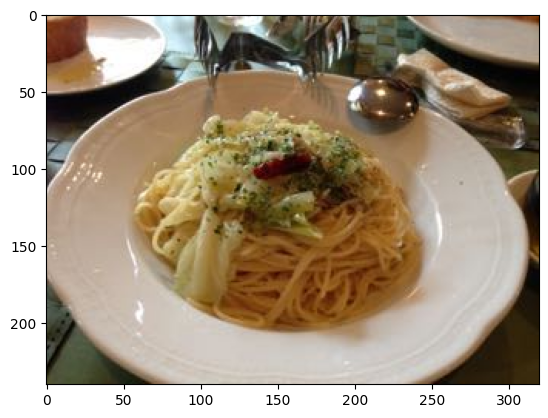

In [5]:
myshow(img)

PIL には様々な機能がありますが，まずは白黒に変換してみましょう．そのためには以下のようにします．

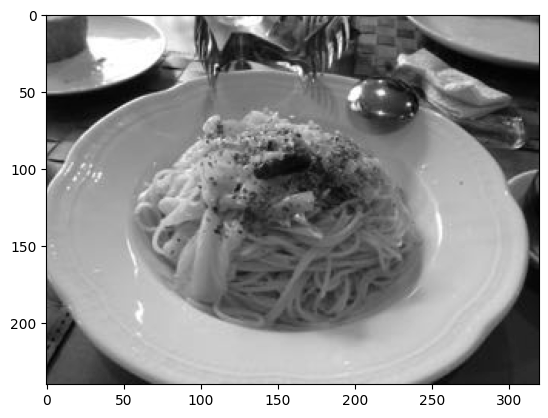

In [6]:
gray_img = img.convert("L")
myshow(gray_img)

画像は左上が原点になっていて，数学で習ってきた座標とは y 方向が逆になっていることに注意してください．

![](https://ogilab.kutc.kansai-u.ac.jp/downloads/complang/figs_kadai08/axis.png)


## crop

それでは今回は画像を切り取り(crop) する練習をしてみましょう．

そのためには crop というメソッドを使います．crop には４つの数字を与えますが，

```crop((x1,y1, x2,y2))```

という形で切り取りたい四角の左上の座標 (x1,y1) と右下の座標 (x2, y2) を与えることによって切り取ることができます．

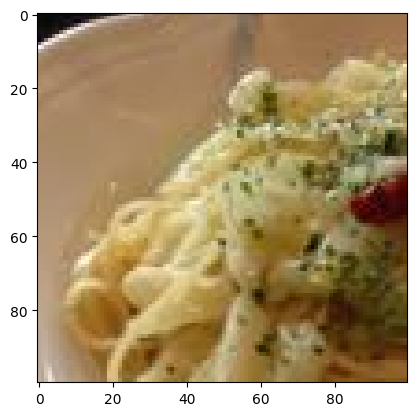

In [7]:
cim = img.crop((50,50,150,150))

myshow(cim)

### 練習6

下の犬の画像について，犬の顔について，白黒にして顔部分を切り取って表示してください．


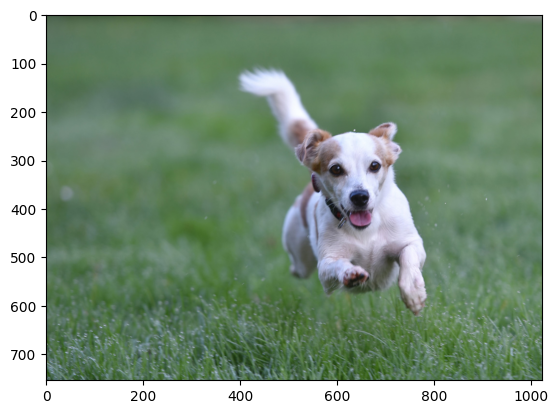

In [8]:
dogimg = Image.open("./dog.jpg")
myshow(dogimg)

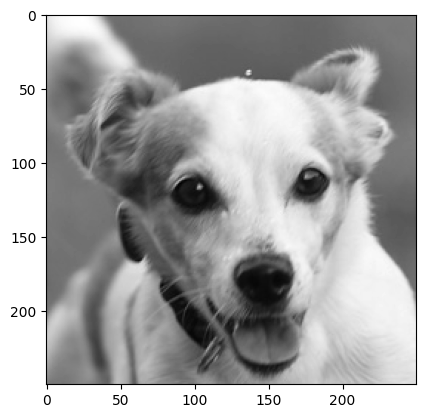

In [18]:
## 白黒に変換

dog_gray = dogimg.convert("L")

## 切り取り

dog_kao =  dog_gray.crop((500,200,750,450))


##表示

myshow(dog_kao)

他のPILの様々な機能については，"PIL python" などで検索をかけるとたくさん出てきますが，例えば以下のようなページがあります．

参考：[Qiita: PIL/Pillow チートシート](https://qiita.com/pashango2/items/145d858eff3c505c100a)

## 課題提出

名前：宮本虎昇

学籍番号：情24－455

感想：数字や文字だけでなく写真も様々な形に変形できることがとても面白かった。

ファイルを保存したら，このファイルをファイルメニューの「.ipynbをダウンロード」からダウンロードし，関大LMSで提出してください．（課題を出す場所を間違えないようにしてください）